In [126]:
install.packages("viridis")
library("viridis")
install.packages("missMDA")
library("missMDA")
install.packages("factoextra")
library("factoextra")
install.packages("MASS")
library("MASS")
install.packages("tidyverse")
library("tidyverse")
install.packages("anomalize")
library("anomalize")
install.packages("ggthemes")
library("ggthemes")
install.packages("ggbeeswarm")
library("ggbeeswarm")
install.packages("reshape")
library("reshape")
install.packages("agricolae")
library("agricolae")

Installing package into 'C:/Users/daeda/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)

Warning message:
"package 'viridis' is in use and will not be installed"
Installing package into 'C:/Users/daeda/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)

Warning message:
"package 'missMDA' is in use and will not be installed"
Installing package into 'C:/Users/daeda/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)

Warning message:
"package 'factoextra' is in use and will not be installed"
Installing package into 'C:/Users/daeda/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)

Warning message:
"package 'MASS' is in use and will not be installed"
Installing package into 'C:/Users/daeda/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)

Warning message:
"package 'tidyverse' is in use and will not be installed"
Installing package into 'C:/Users/daeda/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)

War

package 'e1071' successfully unpacked and MD5 sums checked
package 'classInt' successfully unpacked and MD5 sums checked
package 'labelled' successfully unpacked and MD5 sums checked
package 'combinat' successfully unpacked and MD5 sums checked
package 'questionr' successfully unpacked and MD5 sums checked
package 'klaR' successfully unpacked and MD5 sums checked
package 'AlgDesign' successfully unpacked and MD5 sums checked
package 'agricolae' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\daeda\AppData\Local\Temp\Rtmpi8MUqv\downloaded_packages



Attaching package: 'agricolae'


The following object is masked from 'package:factoextra':

    hcut




In [6]:
ionomics <- read.csv("New_ionStats.csv",header = TRUE,colClasses =c("NULL","NULL","NULL",NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,
                                                                    NA,NA,NA,NA,NA,NA) )
ionomics <- imputePCA(ionomics, method = "Regularized")
ionomics <- ionomics$completeObs

In [7]:
ionsPCA <- prcomp(ionomics,scale = FALSE)
ionsPCAvar <- princomp(ionomics, cor = FALSE,score = TRUE)

In [8]:
eig.val <- get_eigenvalue(ionsPCA)
eig.val

,eigenvalue,variance.percent,cumulative.variance.percent
,<dbl>,<dbl>,<dbl>
Dim.1,4.2863662670,3.413154e+01,34.13154
Dim.2,2.2957921863,1.828097e+01,52.41251
Dim.3,1.3200727499,1.051150e+01,62.92401
Dim.4,0.9091218602,7.239170e+00,70.16318
Dim.5,0.8389626875,6.680505e+00,76.84368
Dim.6,0.7012648841,5.584043e+00,82.42773
Dim.7,0.5119002229,4.076167e+00,86.50389
Dim.8,0.4047144150,3.222666e+00,89.72656
Dim.9,0.3076963790,2.450129e+00,92.17669


This shows the different dimensions, or eigenvalues associated with this PCA. The values are ranked from largest to smallest, as a larger value indicates more % variance explained. This also shows us the % variance explained by each dimension (multiply the eigenvalue by 10), as well as the cumulative % variance explained. With only 2 dimensions, we can explain 49% of the variance of 20 dimensions. 

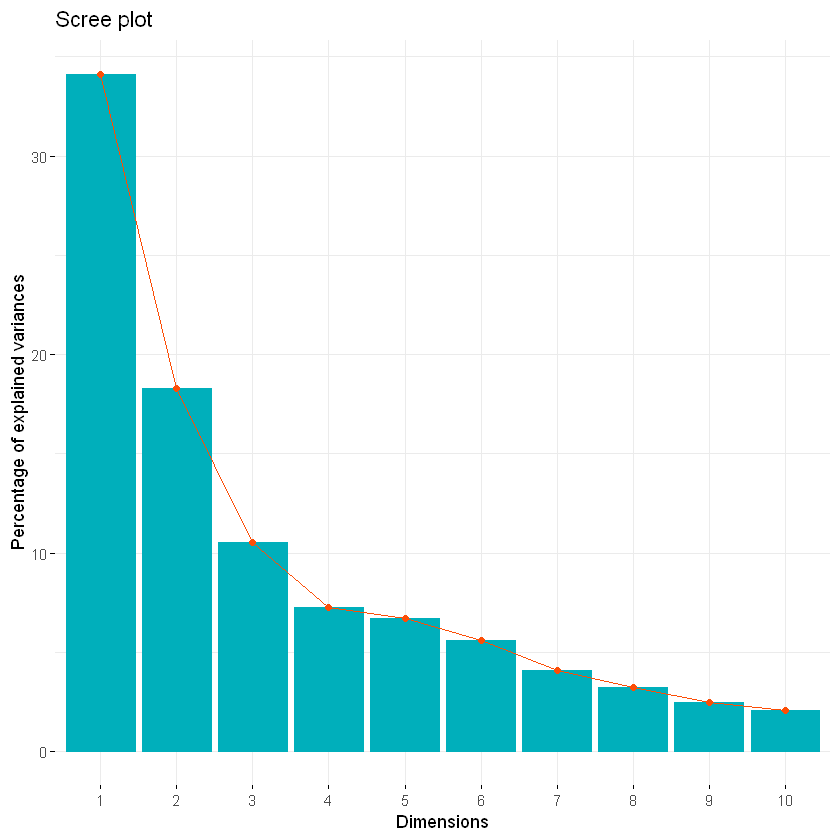

In [9]:
fviz_eig(ionsPCA, linecolor = "#FC4E07",
   barcolor = "#00AFBB", barfill = "#00AFBB")

In [10]:
summary(ionsPCAvar)

Importance of components:
                          Comp.1    Comp.2    Comp.3    Comp.4     Comp.5
Standard deviation     2.0651976 1.5114134 1.1460826 0.9511040 0.91366774
Proportion of Variance 0.3413154 0.1828097 0.1051150 0.0723917 0.06680505
Cumulative Proportion  0.3413154 0.5241251 0.6292401 0.7016318 0.76843684
                           Comp.6     Comp.7     Comp.8     Comp.9    Comp.10
Standard deviation     0.83532988 0.71369003 0.63458720 0.55332229 0.51064766
Proportion of Variance 0.05584043 0.04076167 0.03222666 0.02450129 0.02086774
Cumulative Proportion  0.82427727 0.86503894 0.89726560 0.92176689 0.94263463
                          Comp.11    Comp.12     Comp.13     Comp.14
Standard deviation     0.45262771 0.42128152 0.346831066 0.291872414
Proportion of Variance 0.01639514 0.01420292 0.009626506 0.006817401
Cumulative Proportion  0.95902977 0.97323269 0.982859192 0.989676593
                           Comp.15     Comp.16      Comp.17      Comp.18
Standard deviatio

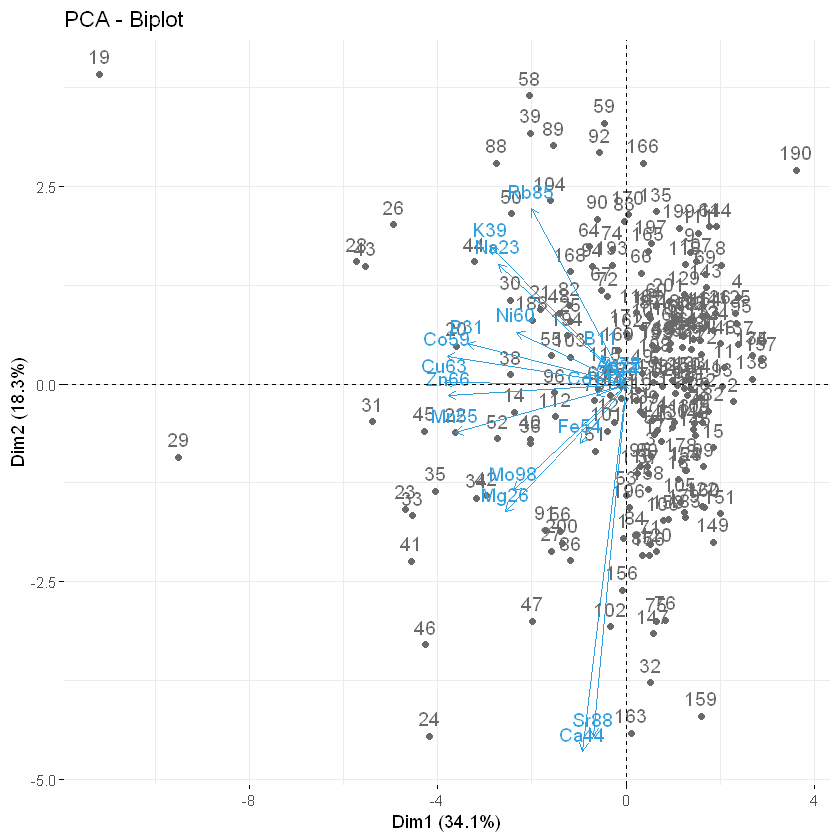

In [11]:
fviz_pca_biplot(ionsPCA, repel = FALSE,
                col.var = "#2E9FDF", # Variables color
                col.ind = "#696969"  # Individuals color
                )

* Positively correlated variables are grouped together
* Negatively correlated variables are positioned on opposite sides of the plot origin (opposed quadrants).
* The distance between variables and the origin measures the quality of the variables on the factor map. Variables that are away from the origin are well represented on the factor map.

From [here](http://www.sthda.com/english/articles/31-principal-component-methods-in-r-practical-guide/112-pca-principal-component-analysis-essentials/)

In [12]:
pcaVars <- get_pca_var(ionsPCA)
pcaVars$contrib[,1]
pcaVars$contrib[,2]

B11         Na23         Mg26         Al27          P31          S34 
 0.248776349  6.747295678  6.070206514  0.006633944 10.436094736  0.002392642 
         K39         Ca44         Fe54         Mn55         Co59         Ni60 
 7.674383193  0.779595070  0.877687744 12.098988308 13.330688115  4.961521028 
        Cu63         Zn66         As75         Rb85         Sr88         Mo98 
13.776238557 13.128432358  0.019503809  3.723806951  0.456037565  5.292267362 
       Cd111 
 0.369450077

B11         Na23         Mg26         Al27          P31          S34 
2.275288e-01 3.941061e+00 4.507857e+00 1.265146e-04 4.470651e-01 7.144438e-04 
         K39         Ca44         Fe54         Mn55         Co59         Ni60 
5.194558e+00 3.720823e+01 9.581800e-01 6.540916e-01 2.117290e-01 7.397091e-01 
        Cu63         Zn66         As75         Rb85         Sr88         Mo98 
4.995511e-04 3.686736e-02 2.447184e-03 8.474614e+00 3.423690e+01 3.124638e+00 
       Cd111 
3.317988e-02

Basically plotting Ca + Sr vs P + Cu

In [13]:
cor(ionomics)

,B11,Na23,Mg26,Al27,P31,S34,K39,Ca44,Fe54,Mn55,Co59,Ni60,Cu63,Zn66,As75,Rb85,Sr88,Mo98,Cd111
B11,1.00000000,0.4309865,-0.02951813,0.18435886,0.02308449,0.07101123,0.1769809,-0.03485434,0.20068530,0.08912558,0.088875273,0.16109535,0.13861191,0.2237912,0.22464465,0.210702844,-0.029563380,0.06745091,0.090042928
Na23,0.43098653,1.0000000,0.12829892,0.39165867,0.36003636,0.22320278,0.3704877,-0.12098001,0.12840897,0.33361998,0.337493860,0.43462231,0.39602993,0.4184365,0.37591790,0.260093042,-0.108088054,0.10606067,0.171606460
Mg26,-0.02951813,0.1282989,1.00000000,0.15609677,0.39153659,0.29601583,0.2690713,0.29463245,0.11015992,0.21098861,0.213238525,0.27140102,0.49524274,0.3740253,0.35424291,0.031954320,0.323981598,0.10926659,0.292026453
Al27,0.18435886,0.3916587,0.15609677,1.00000000,0.29208769,0.23205605,0.2096926,0.02120626,0.10969226,0.25513035,0.253584537,0.27915344,0.29194371,0.3120363,0.33144517,0.214129464,0.121094587,0.14401393,0.131491096
P31,0.02308449,0.3600364,0.39153659,0.29208769,1.00000000,0.52684256,0.5589872,0.02626569,0.26595457,0.31901479,0.382506562,0.49896976,0.67976741,0.3993171,0.36268697,0.290332708,0.013566512,0.38183242,0.264627205
S34,0.07101123,0.2232028,0.29601583,0.23205605,0.52684256,1.00000000,0.2607242,0.36901720,0.45474144,0.56674135,0.489214564,0.34214753,0.45870173,0.4744151,0.32753873,0.197357226,0.308831226,0.45145624,0.251493797
K39,0.17698091,0.3704877,0.26907135,0.20969262,0.55898717,0.26072423,1.0000000,-0.13073687,0.10580413,0.16972404,0.217145970,0.43434409,0.47137189,0.3419428,0.35089305,0.346979291,-0.144855793,0.17464026,0.154119840
Ca44,-0.03485434,-0.1209800,0.29463245,0.02120626,0.02626569,0.36901720,-0.1307369,1.00000000,0.40045798,0.23446682,0.058550633,-0.05347892,0.08107438,0.1924351,-0.02709307,-0.273580445,0.868185116,0.26263906,0.118569370
Fe54,0.20068530,0.1284090,0.11015992,0.10969226,0.26595457,0.45474144,0.1058041,0.40045798,1.00000000,0.34775900,0.339113446,0.22143926,0.24302801,0.3276395,0.08711381,0.094954920,0.327814080,0.33104401,0.105997670
Mn55,0.08912558,0.3336200,0.21098861,0.25513035,0.31901479,0.56674135,0.1697240,0.23446682,0.34775900,1.00000000,0.817270318,0.50602960,0.36817017,0.6601853,0.42030630,0.135844528,0.121235720,0.25767110,0.288146609


In [14]:
cov(ionomics)

,B11,Na23,Mg26,Al27,P31,S34,K39,Ca44,Fe54,Mn55,Co59,Ni60,Cu63,Zn66,As75,Rb85,Sr88,Mo98,Cd111
B11,0.2210717665,0.195408823,-0.013878915,0.0037301863,0.009968334,0.0005253583,0.083213362,-0.0163879074,0.044744020,0.041905303,0.041787615,0.046904971,0.064384822,0.099029848,0.0052476328,0.099068832,-0.013900190,0.031714251,0.012653586
Na23,0.1954088232,0.929881632,0.123719121,0.0162525477,0.318856963,0.0033866891,0.357262694,-0.1166614743,0.058716748,0.321710974,0.325446574,0.259534484,0.377275111,0.379751881,0.0180097449,0.250808686,-0.104229710,0.102274700,0.049458945
Mg26,-0.0138789152,0.123719121,1.000000009,0.0067172853,0.359590371,0.0046577572,0.269071346,0.2946324497,0.052236781,0.210988607,0.213238523,0.168066320,0.489254057,0.352012029,0.0175995635,0.031954320,0.323981598,0.109266587,0.087280972
Al27,0.0037301863,0.016252548,0.006717285,0.0018518241,0.011543801,0.0001571284,0.009023666,0.0009125652,0.002238353,0.010978980,0.010912459,0.007438957,0.012411244,0.012637511,0.0007086182,0.009214596,0.005211042,0.006197327,0.001691195
P31,0.0099683336,0.318856963,0.359590371,0.0115438011,0.843473428,0.0076133967,0.513378337,0.0241226223,0.115823304,0.292985762,0.351297118,0.283778276,0.616754546,0.345151796,0.0165488712,0.266643912,0.012459594,0.350677982,0.072638618
S34,0.0005253583,0.003386689,0.004657757,0.0001571284,0.007613397,0.0002475847,0.004102450,0.0058064211,0.003392964,0.008917576,0.007697705,0.003333838,0.007130313,0.007025496,0.0002560503,0.003105381,0.004859405,0.007103585,0.001182733
K39,0.0832133618,0.357262694,0.269071346,0.0090236662,0.513378337,0.0041024501,0.999999991,-0.1307368736,0.050171307,0.169724034,0.217145966,0.268969560,0.465671853,0.321817716,0.0174331350,0.346979294,-0.144855791,0.174640257,0.046063393
Ca44,-0.0163879074,-0.116661474,0.294632450,0.0009125652,0.024122622,0.0058064211,-0.130736874,1.0000000070,0.189893342,0.234466821,0.058550632,-0.033117066,0.080093995,0.181109333,-0.0013460430,-0.273580449,0.868185115,0.262639057,0.035438056
Fe54,0.0447440197,0.058716748,0.052236781,0.0022383534,0.115823304,0.0033929638,0.050171307,0.1898933423,0.224856564,0.164903989,0.160804348,0.065024442,0.113848007,0.146219598,0.0020522985,0.045026715,0.155446299,0.156977900,0.015022648
Mn55,0.0419053027,0.321710974,0.210988607,0.0109789798,0.292985762,0.0089175757,0.169724034,0.2344668210,0.164903989,0.999999978,0.817270298,0.313361136,0.363718091,0.621330078,0.0208817370,0.135844528,0.121235718,0.257671096,0.086121362


This data lacks a categorical variable, so LDA (discriminante factor analysis), clustering, and anova are all rendered obsolete. We could come up with a categorical variable. Will use species as cat. var. in geneva data when I get there. Kruskill wallace also requires a categorical variable. What are we trying to measure the difference in? If its just ions we can compute the variance for each and just compare them as the scale and distro. are similar. 

In [15]:
for (i in 2:19) {
    print(var(ionomics[,i]))
}

[1] 0.9298816
[1] 1
[1] 0.001851824
[1] 0.8434734
[1] 0.0002475847
[1] 1
[1] 1
[1] 0.2248566
[1] 1
[1] 1
[1] 0.3834762
[1] 0.9759614
[1] 0.8857539
[1] 0.00246832
[1] 1
[1] 1
[1] 1
[1] 0.08932947


What does var. =1 mean?

The means can act as a fingerprint for the ionome of this dataset. Lets preform an anova on this. 

In [124]:
ions <- read.csv("New_ionStats.csv",header = TRUE)
ionsAOV <- matrix(nrow = 201, ncol = 2)
ionsAOV[,1] = ions$Spec_int
ionsAOV[,2] = ionsPCA$x[0:201]
ionsAOV <- as.data.frame(ionsAOV)

In [125]:
aov <- aov(data = ionsAOV, formula = V2 ~ V1)
summary(aov)
aov

             Df Sum Sq Mean Sq F value   Pr(>F)    
V1            1  109.0  109.02   28.99 2.03e-07 ***
Residuals   199  748.3    3.76                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Call:
   aov(formula = V2 ~ V1, data = ionsAOV)

Terms:
                      V1 Residuals
Sum of Squares  109.0191  748.2542
Deg. of Freedom        1       199

Residual standard error: 1.93909
Estimated effects may be unbalanced

Warning message in mean.default(x):
"argument is not numeric or logical: returning NA"


ERROR: Error in var(x): is.atomic(x) is not TRUE
